<a href="https://colab.research.google.com/github/BiancadeFrancisco/Regressao_LinearMultipla_Cars/blob/main/C%C3%B3pia_de_RL_MULTIPLA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PREVER PREÇOS DE AUTOMÓVEIS ATRAVÉS DE VÁRIAS VARIÁVEIS EXPLICATIVAS.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
CarPrice = pd.read_csv("/content/C├│pia de CarPrice_Assignment.csv", sep=",")
CarPrice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
# IMPORTAR BIBLIOTECA DO SKLEARN PARA MODIFICAR VARIÁVEIS QUALITATIVAS EM NUMÉRICAS

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
le.fit(CarPrice.CarName)
CarPrice.CarName = le.transform(CarPrice.CarName)

le.fit(CarPrice.fueltype)
CarPrice.fueltype = le.transform(CarPrice.fueltype)

le.fit(CarPrice.aspiration)
CarPrice.aspiration = le.transform(CarPrice.aspiration)

le.fit(CarPrice.doornumber)
CarPrice.doornumber = le.transform(CarPrice.doornumber)

le.fit(CarPrice.carbody)
CarPrice.carbody = le.transform(CarPrice.carbody)

le.fit(CarPrice.drivewheel)
CarPrice.drivewheel = le.transform(CarPrice.drivewheel)

le.fit(CarPrice.enginelocation)
CarPrice.enginelocation = le.transform(CarPrice.enginelocation)

le.fit(CarPrice.fuelsystem)
CarPrice.fuelsystem = le.transform(CarPrice.fuelsystem)

le.fit(CarPrice.boreratio)
CarPrice.boreratio = le.transform(CarPrice.boreratio)

le.fit(CarPrice.stroke)
CarPrice.stroke = le.transform(CarPrice.stroke)

le.fit(CarPrice.enginetype)
CarPrice.enginetype = le.transform(CarPrice.enginetype)

le.fit(CarPrice.cylindernumber)
CarPrice.cylindernumber = le.transform(CarPrice.cylindernumber)


In [ ]:
CarPrice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,23,4,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,23,4,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,1,28,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,13,25,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,13,25,8.0,115,5500,18,22,17450.0


In [ ]:
CarPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    int64  
 3   fueltype          205 non-null    int64  
 4   aspiration        205 non-null    int64  
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    int64  
 7   drivewheel        205 non-null    int64  
 8   enginelocation    205 non-null    int64  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    int64  
 15  cylindernumber    205 non-null    int64  
 16  enginesize        205 non-null    int64  
 1

In [ ]:
CarPrice.describe()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,77.209756,0.902439,0.180488,0.439024,2.614634,1.326829,0.014634,98.756585,...,126.907317,3.253659,17.926829,19.775610,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,41.014583,0.297446,0.385535,0.497483,0.859081,0.556171,0.120377,6.021776,...,41.642693,2.013204,9.989677,9.004813,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.600000,...,61.000000,0.000000,0.000000,0.000000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,44.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,94.500000,...,97.000000,1.000000,11.000000,13.000000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,80.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,97.000000,...,120.000000,5.000000,16.000000,22.000000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,115.000000,1.000000,0.000000,1.000000,3.000000,2.000000,0.000000,102.400000,...,141.000000,5.000000,26.000000,26.000000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,146.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,120.900000,...,326.000000,7.000000,37.000000,36.000000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


<Axes: xlabel='price', ylabel='Count'>

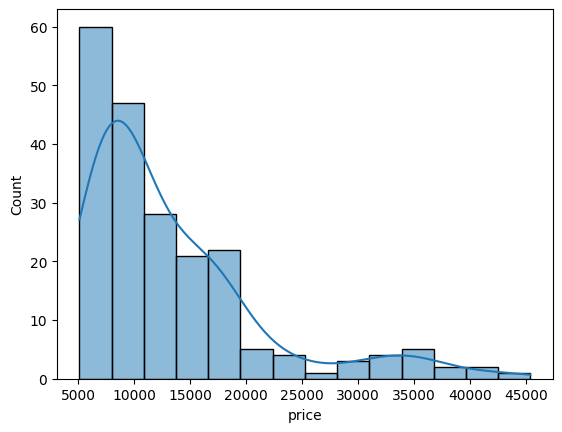

In [ ]:
# HISTOGRAMA COM LINHA DE NORMALIDADE, PARA VERIFICAR A DISTRIBUIÇÃO DOS DADOS DO PREÇO

sns.histplot(CarPrice, x="price", kde=True)

In [ ]:
# COLOCAR OS DADOS EM ESCALAS PRÓXIMAS:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

CarPrice_normalizado = pd.DataFrame(scaler.fit_transform(CarPrice), index=CarPrice.index, columns=CarPrice.columns)

CarPrice_normalizado.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0.000000,1.0,0.013699,1.0,0.0,1.0,0.00,1.0,0.0,0.058309,...,0.260377,0.714286,0.621622,0.111111,0.1250,0.262500,0.346939,0.222222,0.289474,0.207959
1,0.004902,1.0,0.020548,1.0,0.0,1.0,0.00,1.0,0.0,0.058309,...,0.260377,0.714286,0.621622,0.111111,0.1250,0.262500,0.346939,0.222222,0.289474,0.282558
2,0.009804,0.6,0.006849,1.0,0.0,1.0,0.50,1.0,0.0,0.230321,...,0.343396,0.714286,0.027027,0.777778,0.1250,0.441667,0.346939,0.166667,0.263158,0.282558
3,0.014706,0.8,0.027397,1.0,0.0,0.0,0.75,0.5,0.0,0.384840,...,0.181132,0.714286,0.351351,0.694444,0.1875,0.225000,0.551020,0.305556,0.368421,0.219254
4,0.019608,0.8,0.034247,1.0,0.0,0.0,0.75,0.0,0.0,0.373178,...,0.283019,0.714286,0.351351,0.694444,0.0625,0.279167,0.551020,0.138889,0.157895,0.306142


In [ ]:
import statsmodels.formula.api as smf

In [ ]:
function = "price~car_ID+symboling+CarName+fueltype+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carlength+carwidth+carheight+curbweight+enginetype+cylindernumber+enginesize+fuelsystem+compressionratio+horsepower+peakrpm+citympg+highwaympg+boreratio+stroke"

model = smf.ols(formula=function, data=CarPrice_normalizado).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     68.62
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           2.80e-78
Time:                        14:39:27   Log-Likelihood:                 283.12
No. Observations:                 205   AIC:                            -514.2
Df Residuals:                     179   BIC:                            -427.8
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0078      0.185  

In [ ]:
# RETIRAR VARIÁVEIS QUE POSSUEM P-VALUE ALTOS:

function = "price~car_ID+symboling+CarName+fueltype+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+enginetype+cylindernumber+enginesize+fuelsystem+compressionratio+horsepower+peakrpm+citympg+highwaympg+boreratio+stroke"

model = smf.ols(formula=function, data=CarPrice_normalizado).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     71.86
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           3.33e-79
Time:                        14:43:48   Log-Likelihood:                 283.09
No. Observations:                 205   AIC:                            -516.2
Df Residuals:                     180   BIC:                            -433.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0100      0.184  

In [ ]:
function = "price~car_ID+symboling+CarName+fueltype+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+enginetype+cylindernumber+enginesize+compressionratio+horsepower+peakrpm+citympg+highwaympg+boreratio+stroke"

model = smf.ols(formula=function, data=CarPrice_normalizado).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     75.36
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           3.95e-80
Time:                        14:44:19   Log-Likelihood:                 283.04
No. Observations:                 205   AIC:                            -518.1
Df Residuals:                     181   BIC:                            -438.3
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0192      0.181  

In [ ]:
function = "price~car_ID+symboling+CarName+fueltype+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+enginetype+cylindernumber+enginesize+compressionratio+horsepower+peakrpm+citympg+highwaympg+boreratio+stroke"

model = smf.ols(formula=function, data=CarPrice_normalizado).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     79.11
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           4.94e-81
Time:                        14:44:52   Log-Likelihood:                 282.90
No. Observations:                 205   AIC:                            -519.8
Df Residuals:                     182   BIC:                            -443.4
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0670      0.152  

In [ ]:
function = "price~car_ID+CarName+fueltype+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+enginetype+cylindernumber+enginesize+compressionratio+horsepower+peakrpm+citympg+highwaympg+boreratio+stroke"

model = smf.ols(formula=function, data=CarPrice_normalizado).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     83.24
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           5.82e-82
Time:                        14:45:22   Log-Likelihood:                 282.81
No. Observations:                 205   AIC:                            -521.6
Df Residuals:                     183   BIC:                            -448.5
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0803      0.148  

In [ ]:
function = "price~car_ID+CarName+fueltype+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+cylindernumber+enginesize+compressionratio+horsepower+peakrpm+citympg+highwaympg+boreratio+stroke"

model = smf.ols(formula=function, data=CarPrice_normalizado).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     87.72
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           7.10e-83
Time:                        14:45:54   Log-Likelihood:                 282.64
No. Observations:                 205   AIC:                            -523.3
Df Residuals:                     184   BIC:                            -453.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0984      0.144  

In [ ]:
function = "price~car_ID+CarName+fueltype+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+cylindernumber+enginesize+compressionratio+horsepower+peakrpm+highwaympg+boreratio+stroke"

model = smf.ols(formula=function, data=CarPrice_normalizado).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     92.41
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           1.07e-83
Time:                        14:46:22   Log-Likelihood:                 282.20
No. Observations:                 205   AIC:                            -524.4
Df Residuals:                     185   BIC:                            -457.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0883      0.144  

In [ ]:
function = "price~car_ID+CarName+fueltype+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+cylindernumber+enginesize+compressionratio+horsepower+peakrpm+boreratio+stroke"

model = smf.ols(formula=function, data=CarPrice_normalizado).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     97.65
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           1.52e-84
Time:                        14:47:04   Log-Likelihood:                 281.81
No. Observations:                 205   AIC:                            -525.6
Df Residuals:                     186   BIC:                            -462.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0986      0.143  

In [ ]:
function = "price~car_ID+CarName+fueltype+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+cylindernumber+enginesize+horsepower+peakrpm+boreratio+stroke"

model = smf.ols(formula=function, data=CarPrice_normalizado).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     103.6
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           1.87e-85
Time:                        14:47:35   Log-Likelihood:                 281.54
No. Observations:                 205   AIC:                            -527.1
Df Residuals:                     187   BIC:                            -467.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0035      0.048      0.

In [ ]:
function = "price~car_ID+CarName+fueltype+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+cylindernumber+enginesize+horsepower+peakrpm+stroke"

model = smf.ols(formula=function, data=CarPrice_normalizado).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     109.7
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           3.67e-86
Time:                        14:48:09   Log-Likelihood:                 280.72
No. Observations:                 205   AIC:                            -527.4
Df Residuals:                     188   BIC:                            -471.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0018      0.048     -0.

In [ ]:
function = "price~car_ID+CarName+fueltype+doornumber+carbody+drivewheel+enginelocation+carwidth+carheight+curbweight+cylindernumber+enginesize+horsepower+peakrpm+stroke"

model = smf.ols(formula=function, data=CarPrice_normalizado).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     116.8
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           6.09e-87
Time:                        14:48:32   Log-Likelihood:                 280.06
No. Observations:                 205   AIC:                            -528.1
Df Residuals:                     189   BIC:                            -475.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0180      0.045     -0.

In [ ]:
function = "price~car_ID+CarName+fueltype+doornumber+carbody+drivewheel+enginelocation+carwidth+carheight+curbweight+enginesize+horsepower+peakrpm+stroke"

model = smf.ols(formula=function, data=CarPrice_normalizado).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     124.4
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           1.38e-87
Time:                        14:49:04   Log-Likelihood:                 279.02
No. Observations:                 205   AIC:                            -528.0
Df Residuals:                     190   BIC:                            -478.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0004      0.044     -0.

In [ ]:
function = "price~CarName+fueltype+carbody+drivewheel+enginelocation+carwidth+carheight+curbweight+enginesize+horsepower+peakrpm+stroke"

model = smf.ols(formula=function, data=CarPrice_normalizado).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     143.2
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           7.71e-89
Time:                        14:57:46   Log-Likelihood:                 276.76
No. Observations:                 205   AIC:                            -527.5
Df Residuals:                     192   BIC:                            -484.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0414      0.037     -1.

In [ ]:
function = "price~CarName+fueltype+carbody+drivewheel+enginelocation+carwidth+carheight+curbweight+enginesize+horsepower+peakrpm+stroke - 1"

model = smf.ols(formula=function, data=CarPrice_normalizado).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                              309.5
Date:                Thu, 13 Jul 2023   Prob (F-statistic):                   5.48e-119
Time:                        14:50:23   Log-Likelihood:                          276.11
No. Observations:                 205   AIC:                                     -528.2
Df Residuals:                     193   BIC:                                     -488.3
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [ ]:
# TREINAR O MODELO DE MACHINE LEARNING, COM TRAIN TEST SPLIT

x = CarPrice_normalizado[["CarName", "fueltype", "carbody", "drivewheel", "enginelocation", "carwidth", "carheight", "curbweight", "enginesize", "horsepower", "peakrpm", "stroke"]]

y = CarPrice_normalizado[["price"]]

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size=0.20, random_state=42)
# 42 amostras aleatórias, 20% da minha amostra

lr = LinearRegression()

# TREINAR O TREINO

lr.fit(x_treino, y_treino)

LinearRegression()

LinearRegression()

In [ ]:
# MÉTRICAS DO MEU TREINO:
#R²

r_sq = lr.score(x_treino,y_treino)
print(r_sq)

0.906033352439465


In [ ]:
y_pred_treino = lr.predict(x_treino)
print("MAE:", metrics.mean_absolute_error(y_treino, y_pred_treino))
print("MSE:", metrics.mean_squared_error(y_treino, y_pred_treino))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_treino, y_pred_treino)))

MAE: 0.04599378627825252
MSE: 0.003453612194228337
RMSE: 0.05876744161717725


In [ ]:
# TREINAR O TESTE

lr.fit(x_teste, y_teste)

LinearRegression()

LinearRegression()

In [ ]:
y_pred_teste = lr.predict(x_teste)
print("MAE:", metrics.mean_absolute_error(y_teste, y_pred_teste))
print("MSE:", metrics.mean_squared_error(y_teste, y_pred_teste))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_teste, y_pred_teste)))

r_sq = lr.score(x_treino,y_treino)
print(r_sq)

MAE: 0.04220189920101462
MSE: 0.004177545233063427
RMSE: 0.06463393252049134
0.8269803929022412
